<h4>✅ Importar as bibliotecas


In [56]:
import pandas as pd
import seaborn as sns
import statistics as sts
import matplotlib.pyplot as plt
import chardet


<h4> ✅ Carregar corretamente o CSV

In [57]:
# USADO PARA DESCOBRIR QUAL CODIFICÃÇÃO DO CSV
# Estavamos tendo erro ao importar o arquivo.

import chardet

# Detectar codificação
with open('detran.csv', 'rb') as f:
    result = chardet.detect(f.read(100000))  # Lê parte do arquivo para detectar

print("Codificação detectada:", result['encoding'])



Codificação detectada: ISO-8859-1


<h5>Informações Gerais do DataFrame

In [58]:
# VERIFICANDO OS DADOS

df = pd.read_csv('detran.csv', encoding='ISO-8859-1', sep=';')
df.head()

,num_boletim,data_hora_boletim,Nº_envolvido,condutor,cod_severidade,desc_severidade,sexo,cinto_seguranca,Embreagues,Idade,nascimento,categoria_habilitacao,descricao_habilitacao,declaracao_obito,cod_severidade_antiga,especie_veiculo,pedestre,passageiro
0,2020-014152383-001,20/03/2020 02:18,1,S,1,NAO FATAL,M,NAO,NAO,35,06/09/1984,B,"VEICULOS MOTOR. COM ATE 8 PASSAGEIROS, PESO MA...",0,0,BICICLETA,N,N
1,2020-014152383-001,20/03/2020 02:18,2,S,3,SEM FERIMENTOS,F,SIM,SIM,42,11/03/1978,N,NAO INFORMADO ...,0,0,AUTOMOVEL,N,N
2,2020-014152383-001,20/03/2020 02:18,3,N,3,SEM FERIMENTOS,M,SIM,NAO,32,20/11/1987,,...,0,0,AUTOMOVEL,N,S
3,2020-014158612-001,20/03/2020 05:39,1,N,1,NAO FATAL,F,SIM,NAO,72,29/06/1947,,...,0,0,ONIBUS,N,S
4,2020-014158612-001,20/03/2020 05:39,2,S,3,SEM FERIMENTOS,M,SIM,NAO,55,13/03/1965,N,NAO INFORMADO ...,0,0,ONIBUS,N,N


In [59]:
df.shape

(22643, 18)

In [60]:
df.dtypes

num_boletim               object
 data_hora_boletim        object
 Nº_envolvido              int64
 condutor                 object
 cod_severidade            int64
 desc_severidade          object
 sexo                     object
 cinto_seguranca          object
 Embreagues               object
 Idade                     int64
 nascimento               object
 categoria_habilitacao    object
 descricao_habilitacao    object
 declaracao_obito          int64
 cod_severidade_antiga     int64
especie_veiculo           object
 pedestre                 object
 passageiro               object
dtype: object

In [61]:
df.describe(include="all")

,num_boletim,data_hora_boletim,Nº_envolvido,condutor,cod_severidade,desc_severidade,sexo,cinto_seguranca,Embreagues,Idade,nascimento,categoria_habilitacao,descricao_habilitacao,declaracao_obito,cod_severidade_antiga,especie_veiculo,pedestre,passageiro
count,22643,22643,22643.000000,22643,22643.000000,22643,22643,22643,22643,22643.000000,22643,22643,22643,22643.0,22643.0,22643,20489,20598
unique,10624,10456,NaN,2,NaN,4,3,2,3,NaN,12042,14,14,NaN,NaN,22,2,2
top,2020-014233487-001,20/03/2020 16:07,NaN,S,NaN,NAO FATAL,M,SIM,NAO,NaN,00/00/0000,AB,HABILITADO NAS CATEGORIAS A e B ...,NaN,NaN,AUTOMOVEL,N,N
freq,17,17,NaN,19178,NaN,12544,17351,19583,20944,NaN,1504,5413,5413,NaN,NaN,9769,19284,18345
mean,NaN,NaN,1.741465,NaN,1.801175,NaN,NaN,NaN,NaN,34.597624,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
std,NaN,NaN,0.918086,NaN,1.020479,NaN,NaN,NaN,NaN,15.906508,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
25%,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,24.000000,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
50%,NaN,NaN,2.000000,NaN,1.000000,NaN,NaN,NaN,NaN,33.000000,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
75%,NaN,NaN,2.000000,NaN,3.000000,NaN,NaN,NaN,NaN,44.000000,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN


In [62]:
df.isnull().sum()

num_boletim                  0
 data_hora_boletim           0
 Nº_envolvido                0
 condutor                    0
 cod_severidade              0
 desc_severidade             0
 sexo                        0
 cinto_seguranca             0
 Embreagues                  0
 Idade                       0
 nascimento                  0
 categoria_habilitacao       0
 descricao_habilitacao       0
 declaracao_obito            0
 cod_severidade_antiga       0
especie_veiculo              0
 pedestre                 2154
 passageiro               2045
dtype: int64

<h4>✅ Tratamento e limpeza dos dados.

In [63]:
# Remover valores nulos

df.isnull().sum()

num_boletim                  0
 data_hora_boletim           0
 Nº_envolvido                0
 condutor                    0
 cod_severidade              0
 desc_severidade             0
 sexo                        0
 cinto_seguranca             0
 Embreagues                  0
 Idade                       0
 nascimento                  0
 categoria_habilitacao       0
 descricao_habilitacao       0
 declaracao_obito            0
 cod_severidade_antiga       0
especie_veiculo              0
 pedestre                 2154
 passageiro               2045
dtype: int64

In [64]:
# Remover valores nulos

df_limpo = df.dropna()

In [70]:
# Remover duplicadas

df_limpo = df_limpo.drop_duplicates()

In [ ]:
# Renomear Colunas

colunas = [
    'num_boletim', 'data_hora_boletim', 'Nº_envolvido', 'condutor',
    'cod_severidade', 'desc_severidade', 'sexo', 'cinto_seguranca',
    'Embreagues', 'Idade', 'nascimento', 'categoria_habilitacao',
    'descricao_habilitacao', 'declaracao_obito', 'cod_severidade_antiga',
    'especie_veiculo', 'pedestre', 'passageiro'
]

# Ajuste apenas se o número de colunas for compatível
if len(df.columns) == len(colunas):
    df.columns = colunas
else:
    print("Número de colunas não corresponde à lista fornecida.")

In [77]:
# Converter coluna data_hora_boletim de forma segura

df['data_hora_boletim'] = pd.to_datetime(df['data_hora_boletim'], errors='coerce', dayfirst=True)
df['nascimento'] = pd.to_datetime(df['nascimento'], errors='coerce')

In [79]:
# Comparativo Antes X Depois

print("\nDimensão antes:", df.shape)
print("Dimensão depois:", df_limpo.shape)

print("\nValores nulos após limpeza:")
print(df_limpo.isnull().sum())


Dimensão antes: (22643, 18)
Dimensão depois: (20362, 18)

Valores nulos após limpeza:
num_boletim               0
 data_hora_boletim        0
 Nº_envolvido             0
 condutor                 0
 cod_severidade           0
 desc_severidade          0
 sexo                     0
 cinto_seguranca          0
 Embreagues               0
 Idade                    0
 nascimento               0
 categoria_habilitacao    0
 descricao_habilitacao    0
 declaracao_obito         0
 cod_severidade_antiga    0
especie_veiculo           0
 pedestre                 0
 passageiro               0
dtype: int64


<h4>✅ Fazer análise estatística básica


In [83]:
df_limpo.head()

,num_boletim,data_hora_boletim,Nº_envolvido,condutor,cod_severidade,desc_severidade,sexo,cinto_seguranca,Embreagues,Idade,nascimento,categoria_habilitacao,descricao_habilitacao,declaracao_obito,cod_severidade_antiga,especie_veiculo,pedestre,passageiro
0,2020-014152383-001,20/03/2020 02:18,1,S,1,NAO FATAL,M,NAO,NAO,35,06/09/1984,B,"VEICULOS MOTOR. COM ATE 8 PASSAGEIROS, PESO MA...",0,0,BICICLETA,N,N
1,2020-014152383-001,20/03/2020 02:18,2,S,3,SEM FERIMENTOS,F,SIM,SIM,42,11/03/1978,N,NAO INFORMADO ...,0,0,AUTOMOVEL,N,N
2,2020-014152383-001,20/03/2020 02:18,3,N,3,SEM FERIMENTOS,M,SIM,NAO,32,20/11/1987,,...,0,0,AUTOMOVEL,N,S
3,2020-014158612-001,20/03/2020 05:39,1,N,1,NAO FATAL,F,SIM,NAO,72,29/06/1947,,...,0,0,ONIBUS,N,S
4,2020-014158612-001,20/03/2020 05:39,2,S,3,SEM FERIMENTOS,M,SIM,NAO,55,13/03/1965,N,NAO INFORMADO ...,0,0,ONIBUS,N,N


<h4>✅ Visualizar distribuições e padrões com Seaborn

In [96]:
df_limpo.columns

Index(['num_boletim', ' data_hora_boletim', ' Nº_envolvido', ' condutor',
       ' cod_severidade', ' desc_severidade', ' sexo', ' cinto_seguranca',
       ' Embreagues', ' Idade', ' nascimento', ' categoria_habilitacao',
       ' descricao_habilitacao', ' declaracao_obito', ' cod_severidade_antiga',
       'especie_veiculo', ' pedestre', ' passageiro'],
      dtype='object')

In [98]:
print("\nDistribuição do uso do cinto de segurança:")
print(df_limpo[' cinto_seguranca'].value_counts())

print("\nDistribuição percentual:")
print(df_limpo[' cinto_seguranca'].value_counts(normalize=True).round(4) * 100)


Distribuição do uso do cinto de segurança:
 cinto_seguranca
SIM    18891
NAO     1471
Name: count, dtype: int64

Distribuição percentual:
 cinto_seguranca
SIM    92.78
NAO     7.22
Name: proportion, dtype: float64


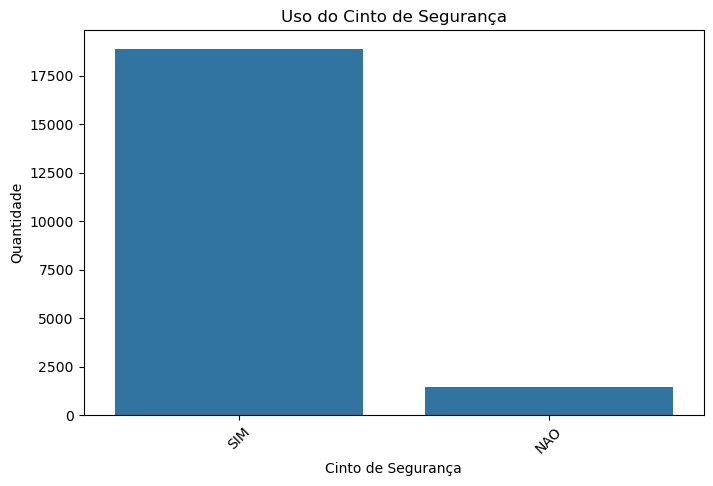

In [100]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df_limpo, x=' cinto_seguranca', order=df_limpo[' cinto_seguranca'].value_counts().index)
plt.title("Uso do Cinto de Segurança")
plt.xlabel("Cinto de Segurança")
plt.ylabel("Quantidade")
plt.xticks(rotation=45)
plt.show()

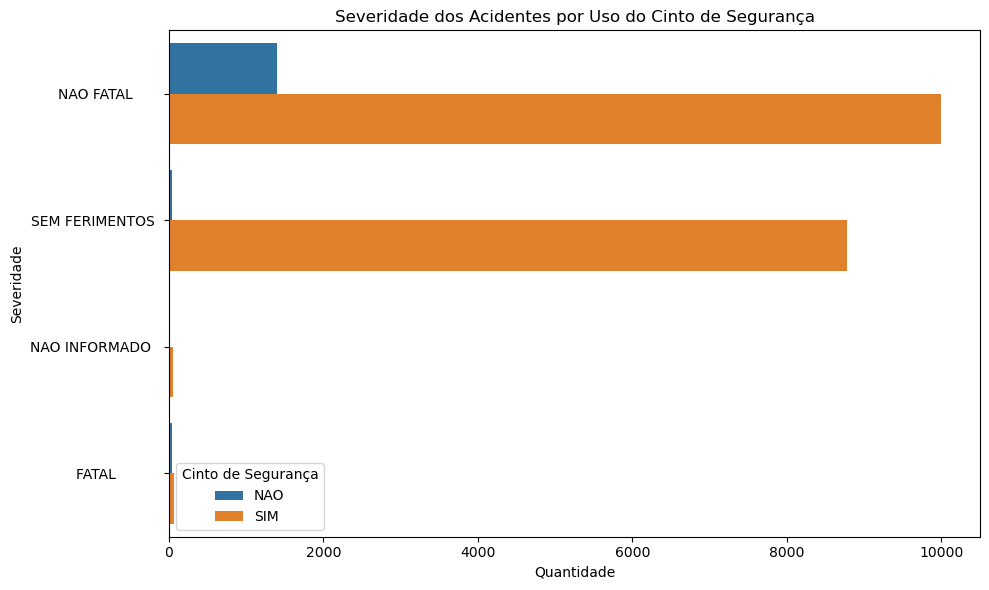

In [101]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_limpo, y=' desc_severidade', hue=' cinto_seguranca')
plt.title("Severidade dos Acidentes por Uso do Cinto de Segurança")
plt.xlabel("Quantidade")
plt.ylabel("Severidade")
plt.legend(title="Cinto de Segurança")
plt.tight_layout()
plt.show()